In [132]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.stats import kstest
# from google.colab import drive
# from cuml.cluster import DBSCAN
# import cudf
# drive.mount('/content/drive/')



In [133]:
# df = pd.read_csv("drive/MyDrive/OpenClassrooms/olist_data/customer_infos.csv")
df = pd.read_csv("data/customer_infos.csv")

In [134]:
df["Frequency"].value_counts()

Frequency
1     90383
2      2752
3       206
4        31
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64

## ANALYSIS

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93391 entries, 0 to 93390
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  93391 non-null  object 
 1   Recency             93391 non-null  int64  
 2   Monetary            93391 non-null  float64
 3   Frequency           93391 non-null  int64  
 4   mean_review_score   93391 non-null  float64
 5   mean_distance       93391 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 4.3+ MB


let's look missing values

In [136]:
df.isna().sum()

customer_unique_id    0
Recency               0
Monetary              0
Frequency             0
mean_review_score     0
mean_distance         0
dtype: int64

### Monetary

<Axes: ylabel='Monetary'>

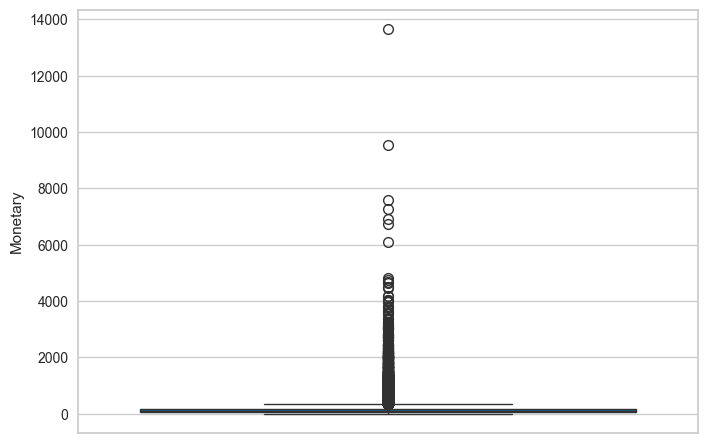

In [137]:
sns.boxplot(df["Monetary"])

I remove monetary above 6000 to have a better look

<Axes: ylabel='Monetary'>

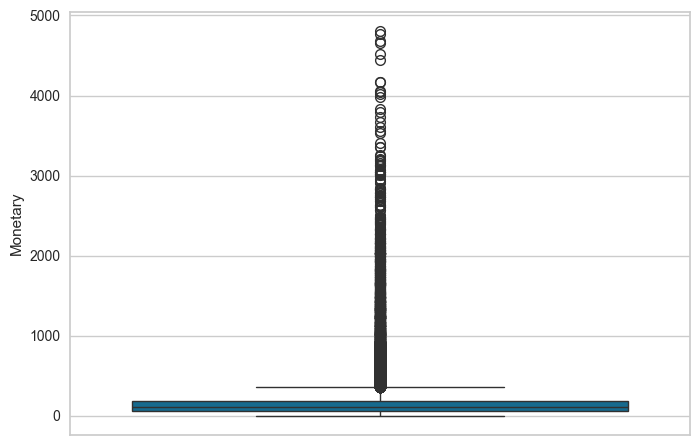

In [138]:
temp = df.loc[df["Monetary"] < 6000, "Monetary"]
sns.boxplot(temp)

### Customer distribution

<Figure size 1500x100 with 0 Axes>

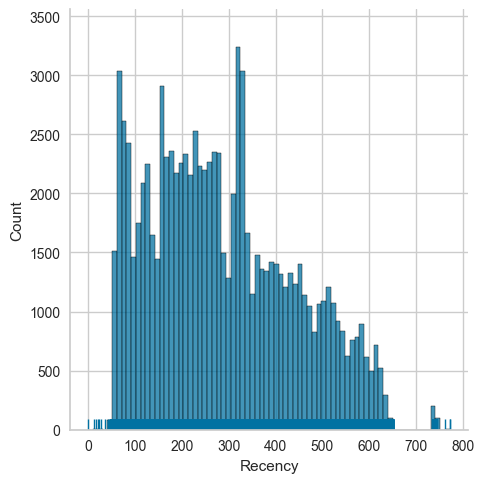

In [139]:
plt.figure(figsize=(15,1))
sns.displot(df["Recency"], kde=False, rug=True)

<Figure size 2000x1200 with 0 Axes>

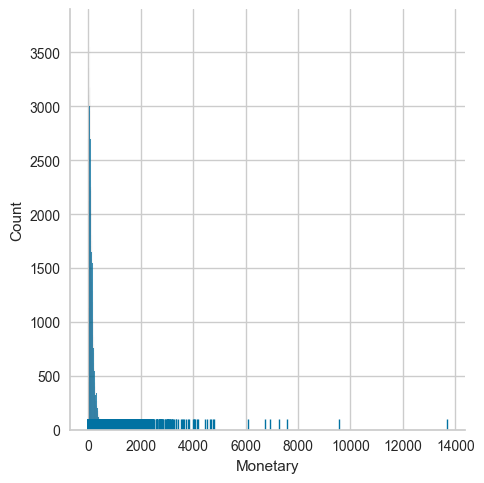

In [140]:
plt.figure(figsize=(20,12))
sns.displot(df["Monetary"], kde=False, rug=True)
plt.show()

<Figure size 1500x100 with 0 Axes>

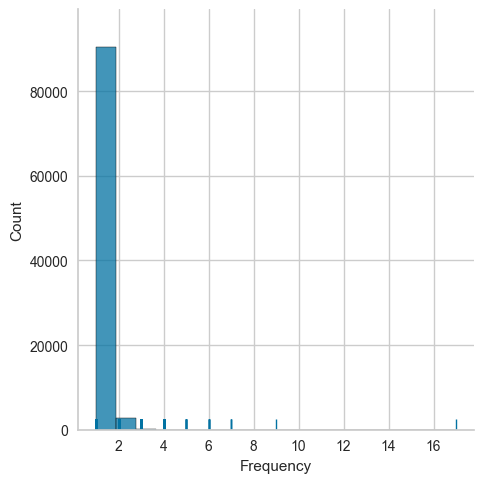

In [141]:
plt.figure(figsize=(15,1))
sns.displot(df["Frequency"], kde=False, rug=True)

<Axes: ylabel='Frequency'>

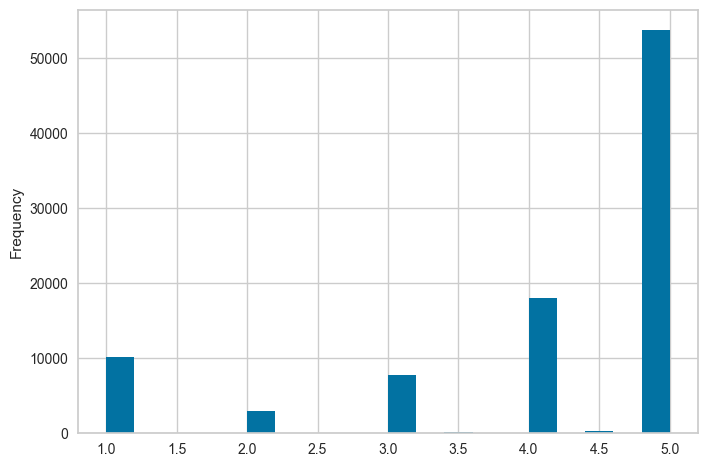

In [142]:
df["mean_review_score"].plot(kind="hist", bins=20)

<Axes: ylabel='Frequency'>

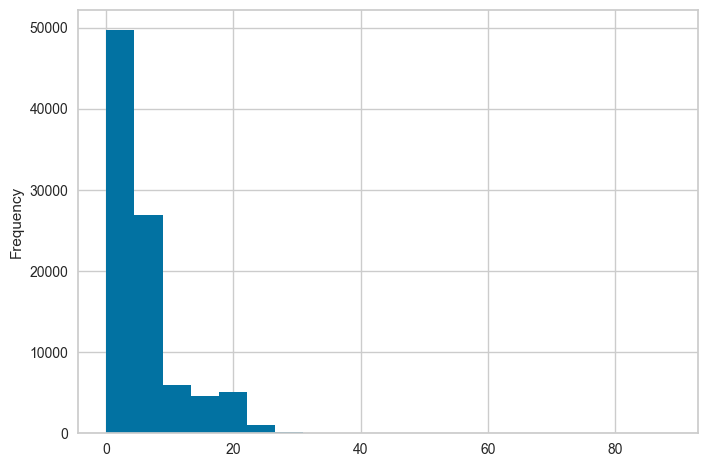

In [143]:
df["mean_distance"].plot(kind="hist", bins=20)

box plot

<Axes: xlabel='Recency', ylabel='Frequency'>

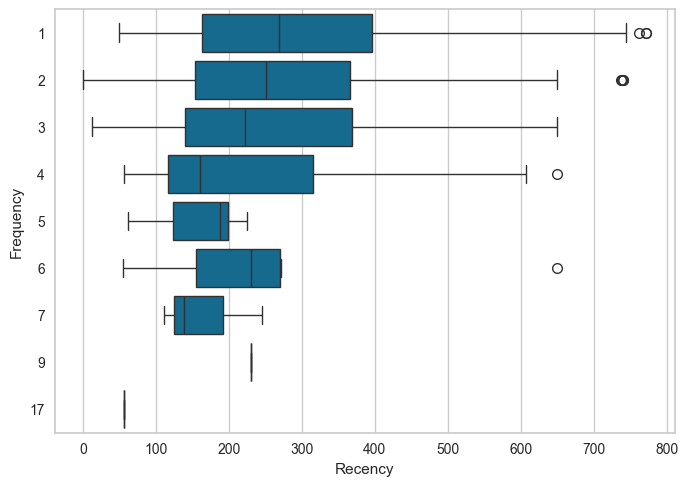

In [144]:
sns.boxplot(x=df["Recency"], y=df["Frequency"], data=df, orient="h")

<Axes: xlabel='Monetary', ylabel='Frequency'>

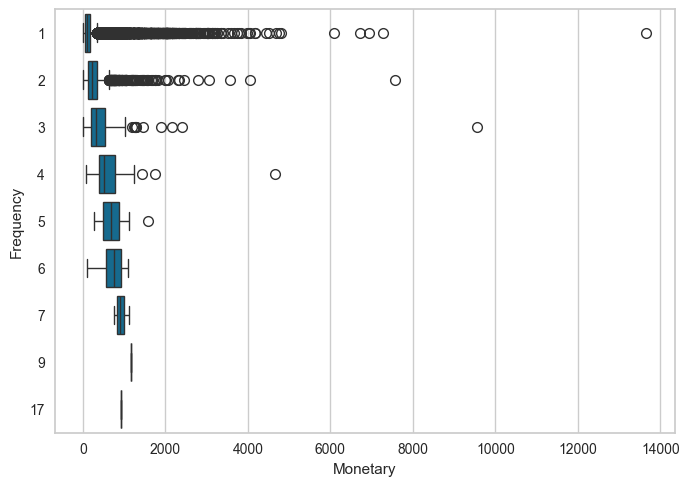

In [145]:
sns.boxplot(x=df["Monetary"], y=df["Frequency"], data=df, orient="h")

# CLUSTURING

In [146]:
X = df.drop(columns="customer_unique_id")
X

,Recency,Monetary,Frequency,mean_review_score,mean_distance
0,160,141.90,1,5.0,1.021571
1,163,27.19,1,4.0,0.137285
2,585,86.22,1,3.0,7.730583
3,369,43.62,1,4.0,17.270880
4,336,196.89,1,5.0,1.437898
...,...,...,...,...,...
93386,495,2067.42,1,5.0,18.224090
93387,310,84.58,1,4.0,13.952046
93388,617,112.46,1,5.0,14.089330
93389,168,133.69,1,5.0,6.143806


let's make a few scatter plot

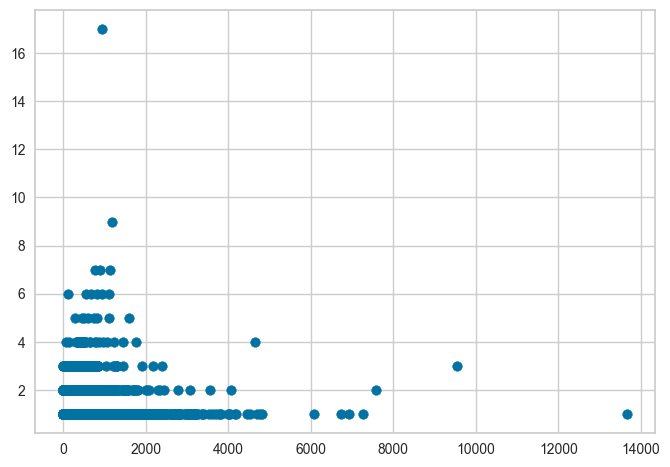

In [147]:
plt.scatter(df["Monetary"], df["Frequency"])

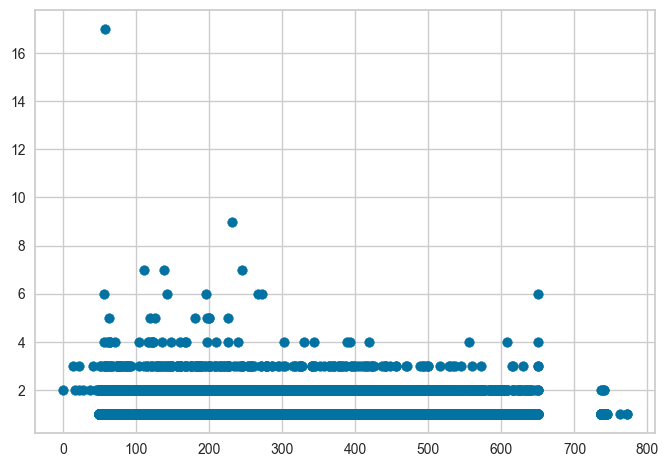

In [148]:
plt.scatter(df["Recency"], df["Frequency"])

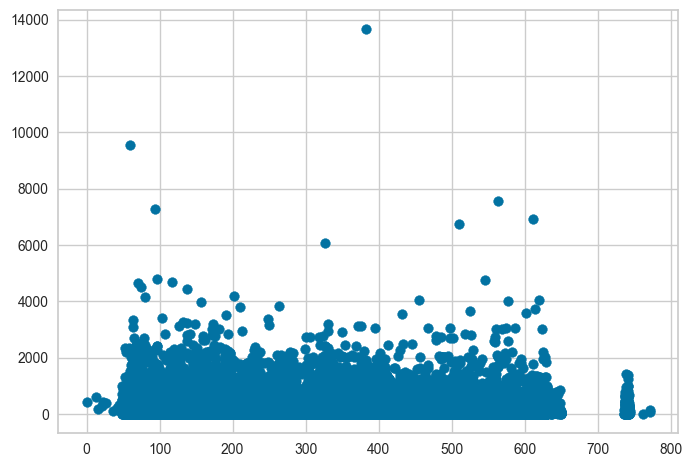

In [149]:
plt.scatter(df["Recency"], df["Monetary"])

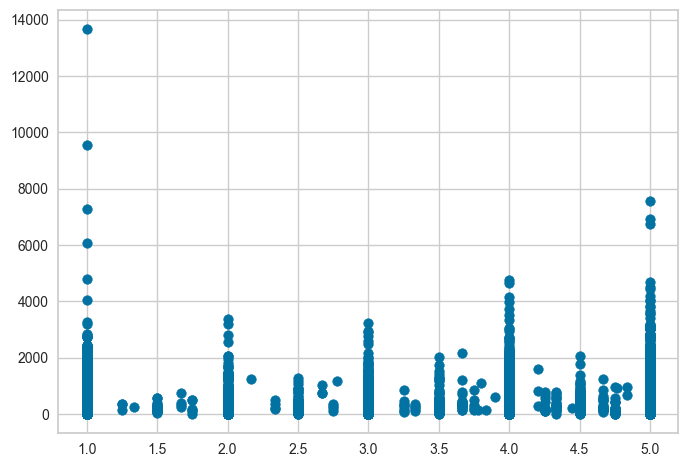

In [150]:
plt.scatter(df["mean_review_score"], df["Monetary"])

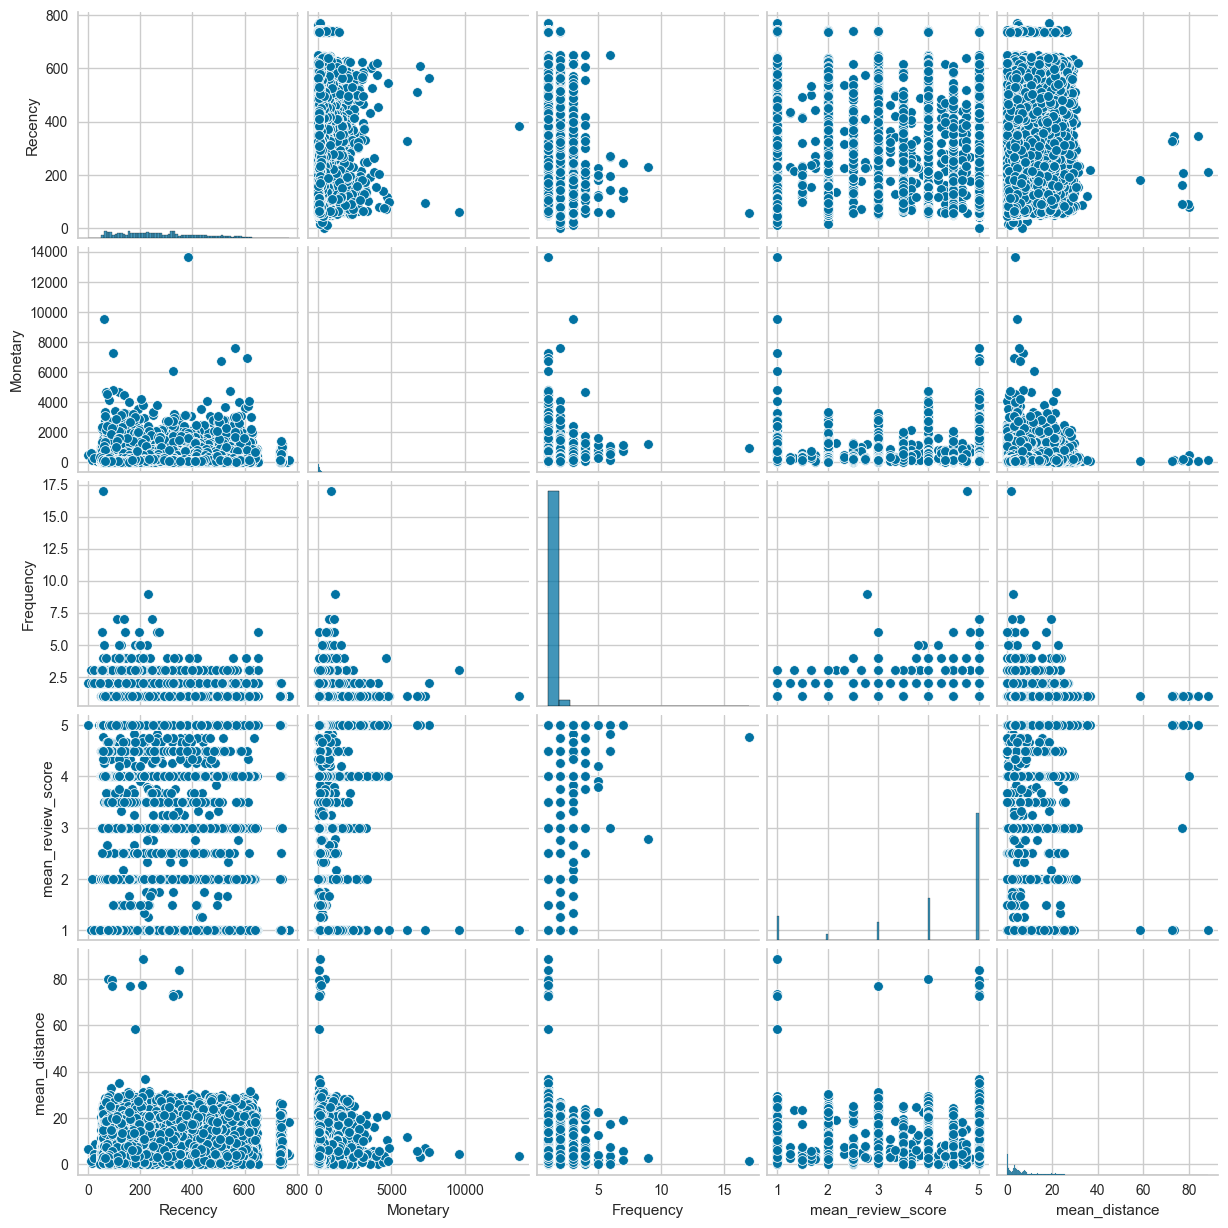

In [151]:
sns.pairplot(X)

## KMEANS

In [152]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### choose the number of cluster

mean silouhette score

In [153]:
for i in range(2, 11):
    model = KMeans(n_clusters=i)
    labels = model.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"N Cluster: {i} | mean silhouette score: {silhouette_avg}")

N Cluster: 2 | mean silhouette score: 0.5896235808907639
N Cluster: 3 | mean silhouette score: 0.2636169537554162
N Cluster: 4 | mean silhouette score: 0.3445518386423619
N Cluster: 5 | mean silhouette score: 0.32321421498427166
N Cluster: 6 | mean silhouette score: 0.3413904312316854
N Cluster: 7 | mean silhouette score: 0.34236572421919403
N Cluster: 8 | mean silhouette score: 0.3277082354893397
N Cluster: 9 | mean silhouette score: 0.2760886772492691
N Cluster: 10 | mean silhouette score: 0.2620229183250167


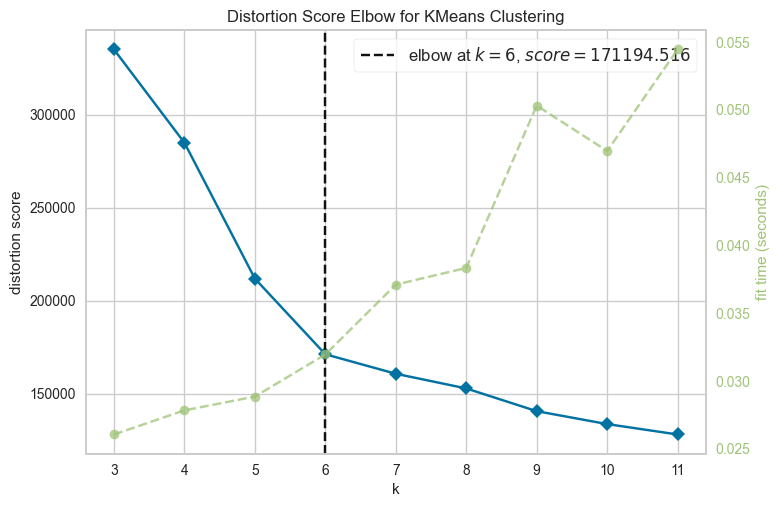

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [110]:
model = KMeans(n_clusters=6)
labels = model.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, labels)

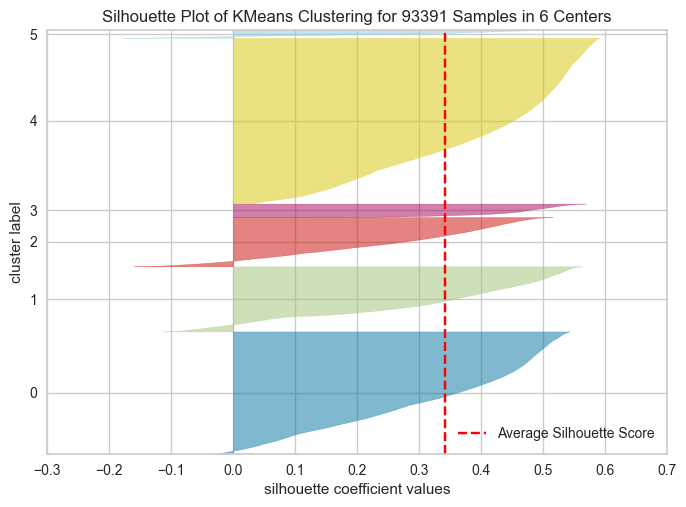

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 93391 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [111]:
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

box plot

<Axes: ylabel='Recency'>

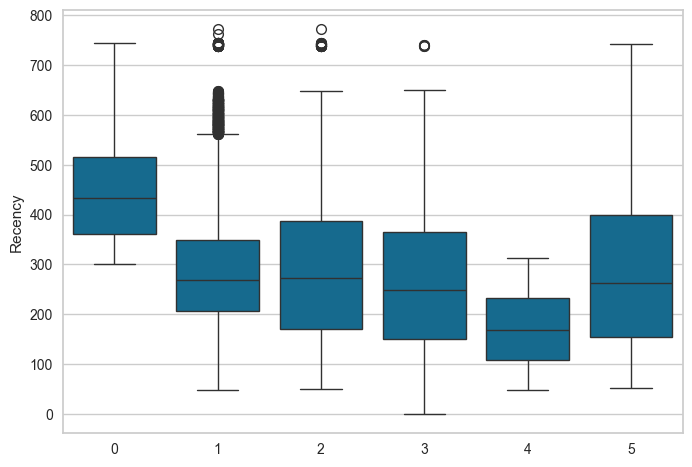

In [112]:
sns.boxplot(x=labels, y = X["Recency"])

<Axes: ylabel='Frequency'>

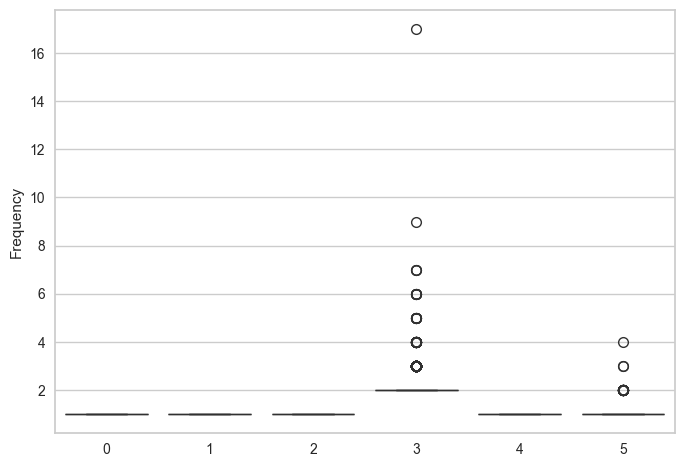

In [113]:
sns.boxplot(x=labels, y = X["Frequency"])

<Axes: ylabel='Monetary'>

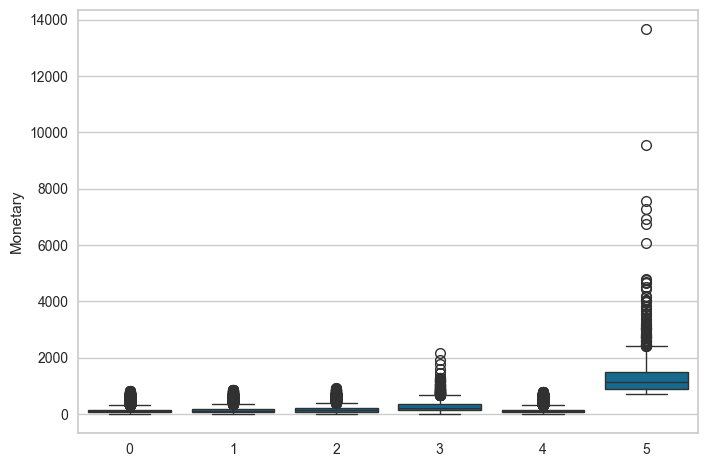

In [114]:
sns.boxplot(x=labels, y = X["Monetary"])

<Axes: ylabel='mean_distance'>

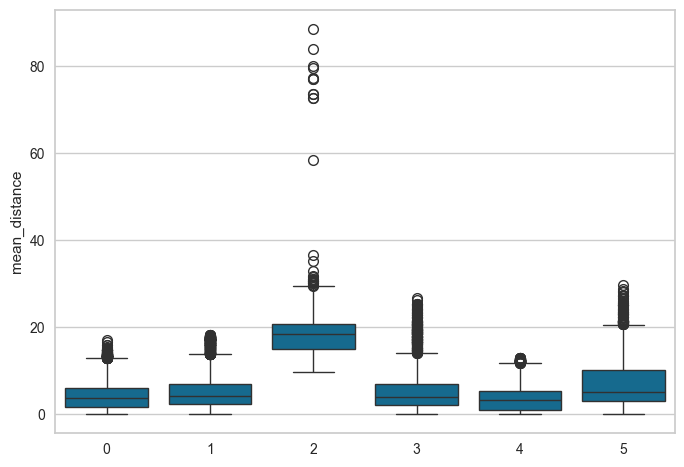

In [115]:
sns.boxplot(x=labels, y = X["mean_distance"])

<Axes: ylabel='mean_review_score'>

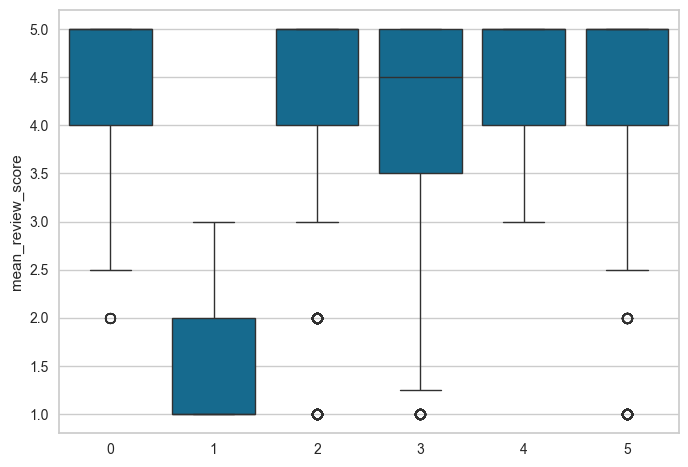

In [116]:
sns.boxplot(x=labels, y = X["mean_review_score"])

### Make a PCA to visualize our labels

In [117]:
pca = PCA(n_components=5
          )

X_pca = pca.fit_transform(X_scaled)
eig = pd.DataFrame(
    {
        "Dimension" : pca.get_feature_names_out(),
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,pca0,1.169715,23.0,23.0
1,pca1,1.075525,22.0,45.0
2,pca2,0.974410,19.0,64.0
3,pca3,0.944899,19.0,83.0
4,pca4,0.835504,17.0,100.0


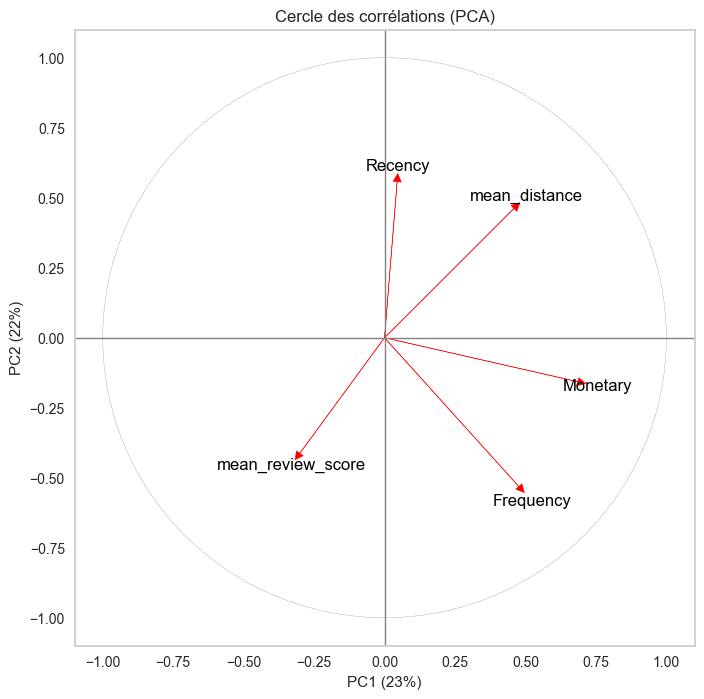

In [118]:
# Cercle des corrélations pour les deux premières dimensions de la PCA
plt.figure(figsize=(8, 8))
# Cercle unité
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Affichage des flèches pour chaque variable
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.03, head_length=0.03, fc='red', ec='red')
    plt.text(pca.components_[0, i]*1.1, pca.components_[1, i]*1.1, var, color='black', ha='center', va='center')

plt.xlabel("PC1 (%s%%)" % int(eig.loc[0, "% variance expliquée"]))
plt.ylabel("PC2 (%s%%)" % int(eig.loc[1, "% variance expliquée"]))
plt.title("Cercle des corrélations (PCA)")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()

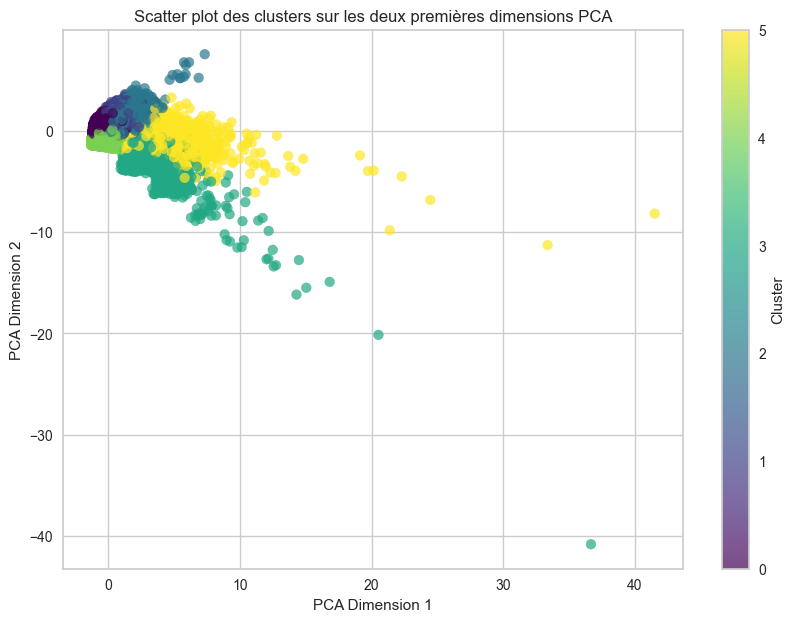

In [119]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('Scatter plot des clusters sur les deux premières dimensions PCA')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [120]:
unique, count = np.unique(labels, return_counts=True)
count

array([26973, 14364, 10858,  2968, 36560,  1668])

Silhouette

In [121]:
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

In [122]:
sample_silhouette_values

array([0.40050901, 0.37753567, 0.44888509, ..., 0.42202376, 0.39617046,
       0.47591855])

## Stabilité temporel kmeans

In [123]:
from sklearn.metrics import adjusted_rand_score
import os

In [124]:
one_year_df = pd.read_csv("data_temporel/customer_infos_2017-9.csv")

X = one_year_df.drop(columns=["customer_unique_id"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = KMeans(n_clusters=6, random_state=42)
reference_labels = model.fit_predict(X_scaled)
one_year_df["labels"] = reference_labels
reference_id = one_year_df["customer_unique_id"].tolist()
reference_labels = one_year_df["labels"].tolist()




In [125]:
date = [
 '17-9',
 '17-10',
 '17-11',
 '17-12',
 '18-1',
 '18-2',
 '18-3',
 '18-4',
 '18-5',
 '18-6',
 '18-7',
 '18-8',
 '18-9',
 '18-10']

for i in range(len(date)):
    temp_df = pd.read_csv(f"data_temporel/customer_infos_20{date[i]}.csv")
    X = temp_df.drop(columns=["customer_unique_id"])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = KMeans(n_clusters=6, random_state=42)
    labels = model.fit_predict(X_scaled)

    temp_df["labels"] = labels
    labels = temp_df.loc[(temp_df["customer_unique_id"].isin(reference_id))]["labels"].tolist()


    ari = adjusted_rand_score(reference_labels, labels)

    print(f"20{date[i]}\n{i} month: ari = {ari}\n")


2017-9
0 month: ari = 1.0

2017-10
1 month: ari = 0.7507188564371451

2017-11
2 month: ari = 0.5974174011579673

2017-12
3 month: ari = 0.4180016913158289

2018-1
4 month: ari = 0.35604122965433893

2018-2
5 month: ari = 0.35428411906538865

2018-3
6 month: ari = 0.37429677736507966

2018-4
7 month: ari = 0.38794052174282756

2018-5
8 month: ari = 0.39810383065509075

2018-6
9 month: ari = 0.39811306778529404

2018-7
10 month: ari = 0.39828181706370785

2018-8
11 month: ari = 0.4727135242102191

2018-9
12 month: ari = 0.4040003923722251

2018-10
13 month: ari = 0.3467293346956513



In [131]:
kstest(rvs=reference_labels, cdf=labels)

KstestResult(statistic=0.4511001347103727, pvalue=0.0, statistic_location=0, statistic_sign=-1)

## CAH

## DBScan

### Data transformation

In [3]:
X = df[['Recency', 'Monetary', 'Frequency',
       'mean_review_score', 'mean_distance']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.astype(np.float64)
X_gpu = cudf.DataFrame.from_records(X_scaled)


In [4]:
X_gpu

,0,1,2,3,4
0,-0.828021,-0.081022,-0.165053,0.677199,-0.835307
1,-0.808409,-0.589300,-0.165053,-0.076964,-0.992171
2,1.950268,-0.327739,-0.165053,-0.831127,0.354806
3,0.538244,-0.516499,-0.165053,-0.076964,2.047161
4,0.322518,0.162637,-0.165053,0.677199,-0.761455
...,...,...,...,...,...
93386,1.361924,8.450910,-0.165053,0.677199,2.216251
93387,0.152552,-0.335006,-0.165053,-0.076964,1.458432
93388,2.159457,-0.211470,-0.165053,0.677199,1.482785
93389,-0.775724,-0.117401,-0.165053,0.677199,0.073327


In [5]:
X_scaled

array([[-0.82802085, -0.08102248, -0.16505262,  0.67719937, -0.83530715],
       [-0.8084094 , -0.58929973, -0.16505262, -0.0769638 , -0.99217079],
       [ 1.95026799, -0.32773922, -0.16505262, -0.83112698,  0.3548057 ],
       ...,
       [ 2.1594568 , -0.21147041, -0.16505262,  0.67719937,  1.48278502],
       [-0.77572365, -0.11740079, -0.16505262,  0.67719937,  0.07332702],
       [ 1.60379903, -0.39269733, -0.16505262,  0.67719937, -0.41361776]])

### Knn to choise eps

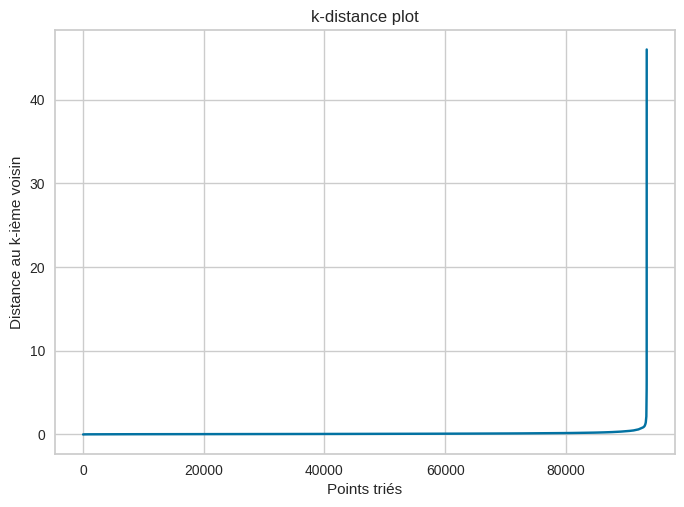

In [6]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


min_samples = 5

# On calcule les distances aux k plus proches voisins
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# On prend la distance au k-ième voisin
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.ylabel("Distance au k-ième voisin")
plt.xlabel("Points triés")
plt.title("k-distance plot")
plt.show()

### train

In [23]:
db = DBSCAN(eps=1.5, min_samples=10)
labels = db.fit_predict(X_gpu)

[2025-09-05 07:14:45.323] [CUML] [info] Batch size limited by the chosen integer type (4 bytes). 27106 -> 22994. Using the larger integer type might result in better performance


In [24]:
labels = labels.to_arrow().to_pylist()

In [25]:
df["labels_dbscan"] = labels
df

,customer_unique_id,Recency,Monetary,Frequency,mean_review_score,mean_distance,labels_dbscan
0,0000366f3b9a7992bf8c76cfdf3221e2,160,141.90,1,5.0,1.021571,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,27.19,1,4.0,0.137285,0
2,0000f46a3911fa3c0805444483337064,585,86.22,1,3.0,7.730583,0
3,0000f6ccb0745a6a4b88665a16c9f078,369,43.62,1,4.0,17.270880,0
4,0004aac84e0df4da2b147fca70cf8255,336,196.89,1,5.0,1.437898,0
...,...,...,...,...,...,...,...
93386,fffcf5a5ff07b0908bd4e2dbc735a684,495,2067.42,1,5.0,18.224090,0
93387,fffea47cd6d3cc0a88bd621562a9d061,310,84.58,1,4.0,13.952046,0
93388,ffff371b4d645b6ecea244b27531430a,617,112.46,1,5.0,14.089330,0
93389,ffff5962728ec6157033ef9805bacc48,168,133.69,1,5.0,6.143806,0


### analysis labels dbscan

In [26]:
df["labels_dbscan"].value_counts()

,count
labels_dbscan,
0,90314
1,2730
2,191
-1,138
3,18


### pca

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=5
          )

X_pca = pca.fit_transform(X_scaled)
eig = pd.DataFrame(
    {
        "Dimension" : pca.get_feature_names_out(),
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,pca0,1.169715,23.0,23.0
1,pca1,1.075525,22.0,45.0
2,pca2,0.974410,19.0,64.0
3,pca3,0.944899,19.0,83.0
4,pca4,0.835504,17.0,100.0


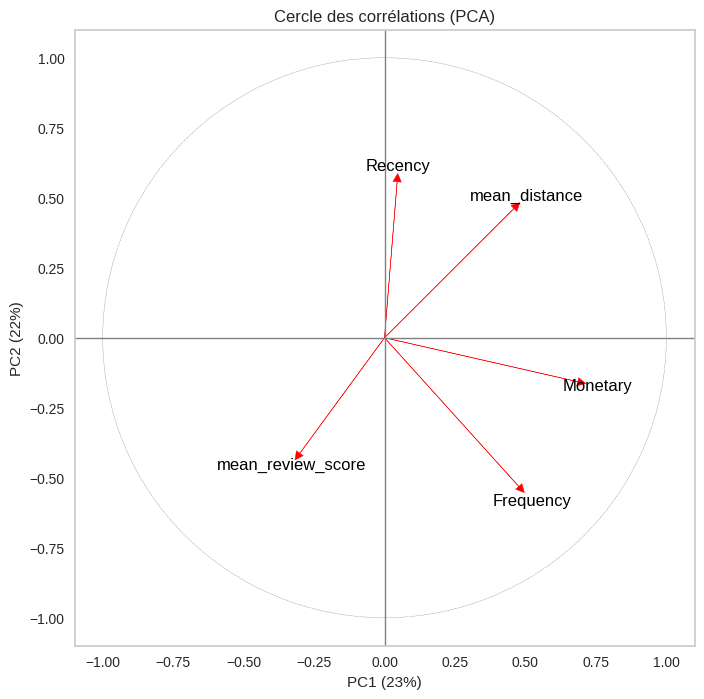

In [29]:
# Cercle des corrélations pour les deux premières dimensions de la PCA
plt.figure(figsize=(8, 8))
# Cercle unité
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Affichage des flèches pour chaque variable
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.03, head_length=0.03, fc='red', ec='red')
    plt.text(pca.components_[0, i]*1.1, pca.components_[1, i]*1.1, var, color='black', ha='center', va='center')

plt.xlabel("PC1 (%s%%)" % int(eig.loc[0, "% variance expliquée"]))
plt.ylabel("PC2 (%s%%)" % int(eig.loc[1, "% variance expliquée"]))
plt.title("Cercle des corrélations (PCA)")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()

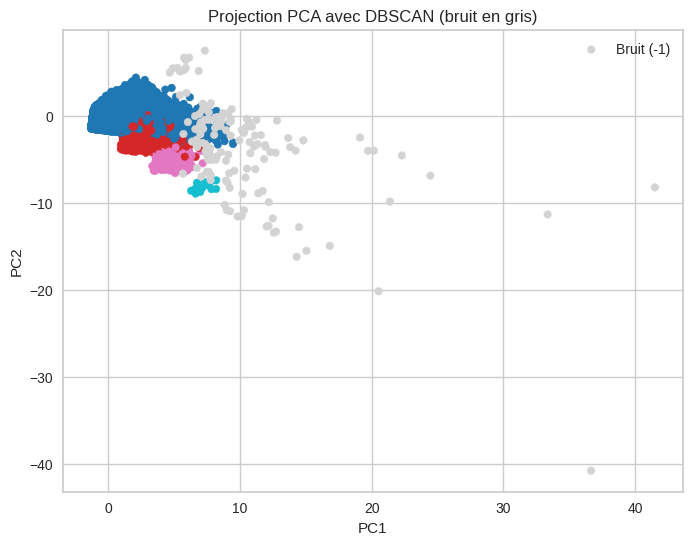

In [30]:
labels = np.array(labels)

mask_noise = labels == -1
mask_cluster = labels != -1

plt.figure(figsize=(8,6))

# Clusters normaux
plt.scatter(
    X_pca[mask_cluster, 0],
    X_pca[mask_cluster, 1],
    c=labels[mask_cluster],
    cmap="tab10",
    s=30
)


plt.scatter(
    X_pca[mask_noise, 0],
    X_pca[mask_noise, 1],
    c=["lightgray"] * mask_noise.sum(),
    s=30,
    label="Bruit (-1)"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection PCA avec DBSCAN (bruit en gris)")
plt.legend()
plt.show()

<Axes: xlabel='labels_dbscan', ylabel='Recency'>

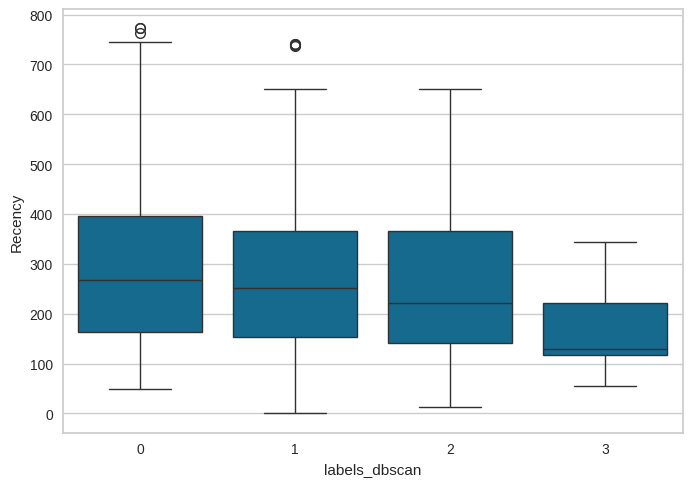

In [31]:
sns.boxplot(x="labels_dbscan", y="Recency", data=df.loc[-(df["labels_dbscan"]==-1)])

<Axes: xlabel='labels_dbscan', ylabel='Frequency'>

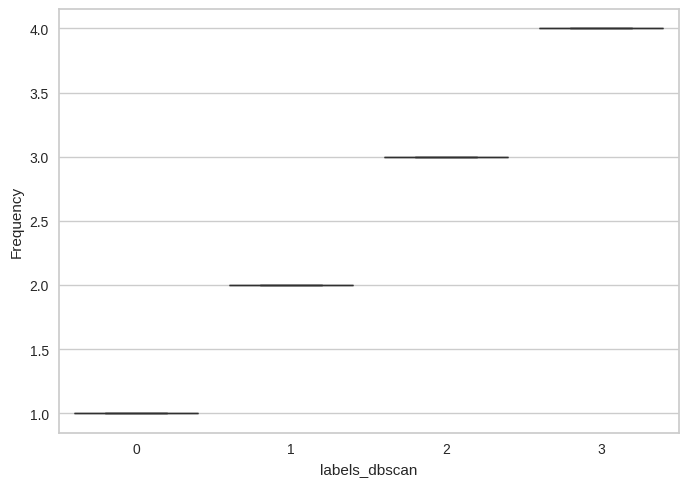

In [32]:
sns.boxplot(x="labels_dbscan", y="Frequency", data=df.loc[-(df["labels_dbscan"]==-1)])

<Axes: xlabel='labels_dbscan', ylabel='mean_review_score'>

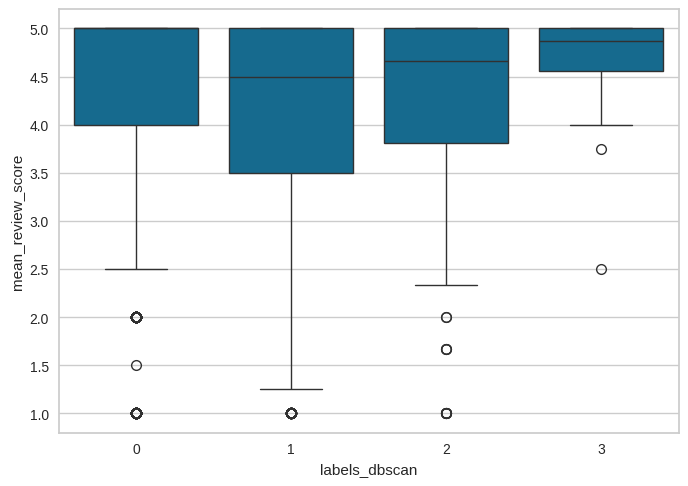

In [33]:
sns.boxplot(x="labels_dbscan", y="mean_review_score", data=df.loc[-(df["labels_dbscan"]==-1)])

<Axes: xlabel='labels_dbscan', ylabel='mean_distance'>

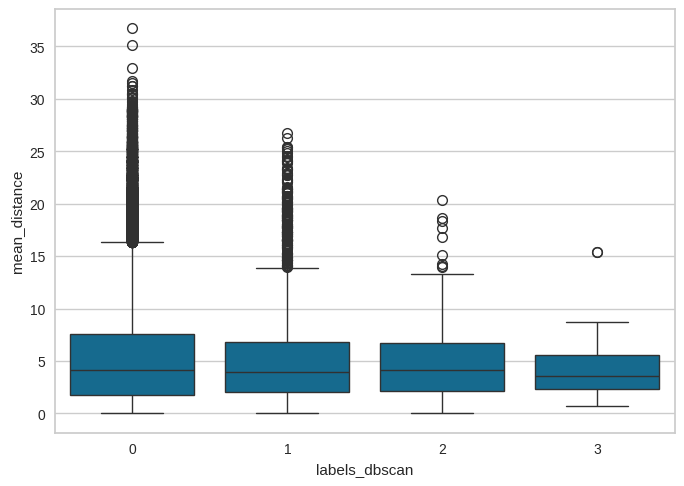

In [34]:
sns.boxplot(x="labels_dbscan", y="mean_distance", data=df.loc[-(df["labels_dbscan"]==-1)])

<Axes: xlabel='labels_dbscan', ylabel='Monetary'>

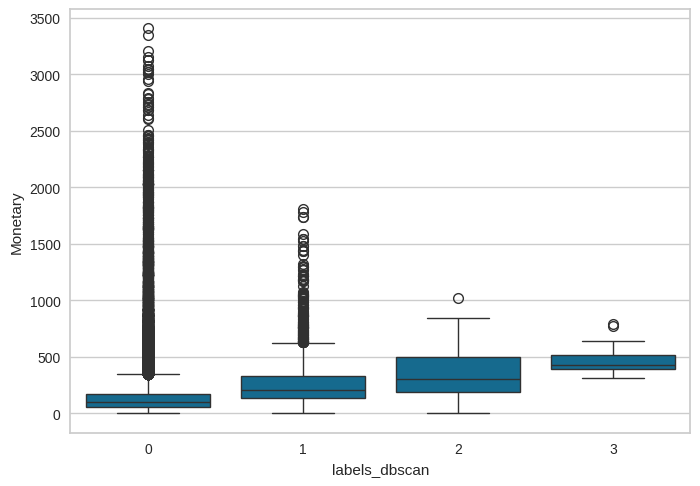

In [35]:
sns.boxplot(x="labels_dbscan", y="Monetary", data=df.loc[-(df["labels_dbscan"]==-1)])

In [36]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_db = dbscan.fit_predict(X_scaled)
silhouette_dbscan = silhouette_score(X_scaled, labels_db)
print("Silhouette Score for DBSCAN:", silhouette_dbscan)


[2025-09-05 07:14:57.168] [CUML] [info] Batch size limited by the chosen integer type (4 bytes). 27106 -> 22994. Using the larger integer type might result in better performance


KeyboardInterrupt: 

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
labels_db = dbscan.fit_predict(X_scaled)
silhouette_dbscan = silhouette_score(X_scaled, labels_db)
print("Silhouette Score for DBSCAN:", silhouette_dbscan)


Silhouette Score for DBSCAN: 0.5452597762533737


In [ ]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

AttributeError: 'DBSCAN' object has no attribute 'n_clusters'